In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from oetils import init_plotting

In [2]:
W = init_plotting(latex=True, sans=True)

In [3]:
D = 2.00  # Horizontal amplitude [m]
g = 9.81  # Acceleration of gravity [m/s^2]
data = pd.DataFrame({
    'L': [12.00, 10.00, 8.00, 6.00, 5.00, 4.00, 3.00, 2.50, 2.30],  # Pendulum length [m]
    'T': [6.96, 6.36, 5.70, 4.95, 4.54, 4.08, 3.60, 3.35, 3.27]     # Period [s]
})
data

,L,T
0,12.0,6.96
1,10.0,6.36
2,8.0,5.70
3,6.0,4.95
4,5.0,4.54
5,4.0,4.08
6,3.0,3.60
7,2.5,3.35
8,2.3,3.27


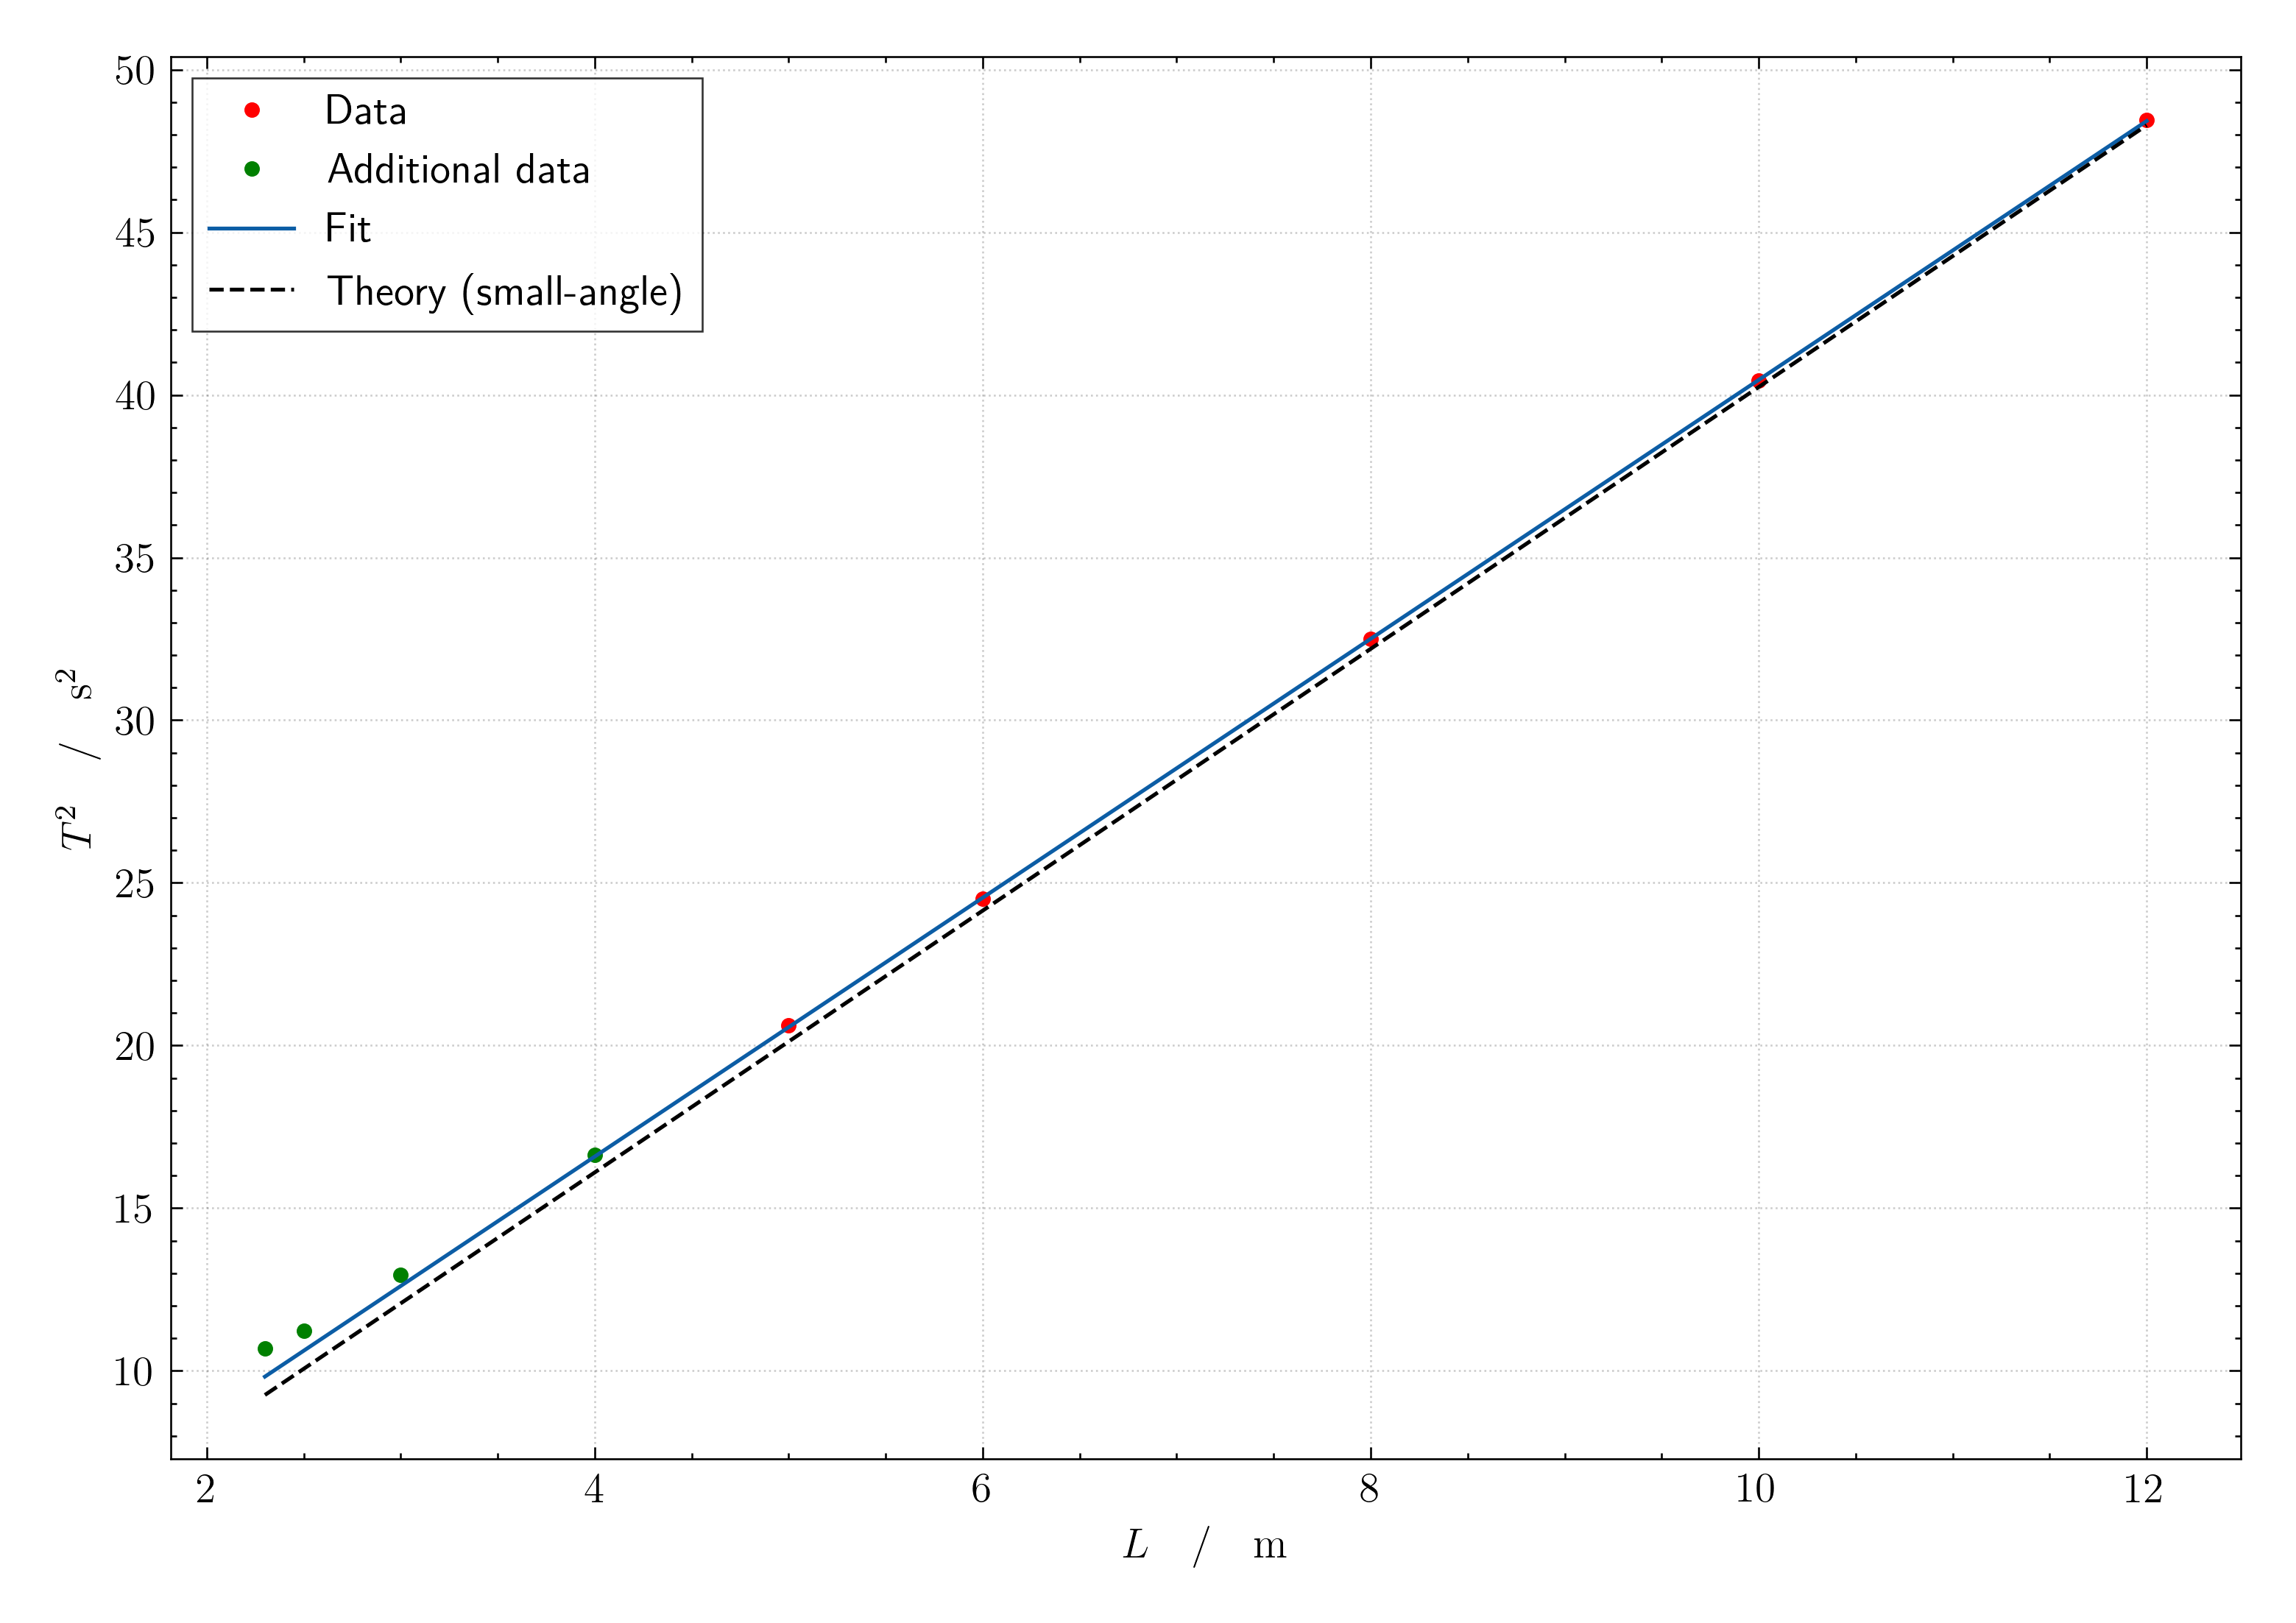

In [4]:
# Least squares fit for five largest values
x = np.stack([np.ones(5), data.L[:5]]).T
y = data['T'][:5] ** 2
w = np.linalg.lstsq(x, y)[0]

# Plot
fig, ax = plt.subplots()
ax.set_xlabel(r"$L\quad/\quad\mathrm{m}$")
ax.set_ylabel(r"$T^2\quad/\quad\mathrm{s^2}$")
ax.plot(data.L[:5], data['T'][:5] ** 2, 'r.', label="Data")
ax.plot(data.L[5:], data['T'][5:] ** 2, 'g.', label="Additional data")
x = np.linspace(data.L.min(), data.L.max())
ax.plot(x, sum(w[i] * x**i for i in range(2)), label="Fit")
ax.plot(x, 4 * np.pi**2 * x / g, 'k--', label="Theory (small-angle)")
ax.legend()
plt.show()

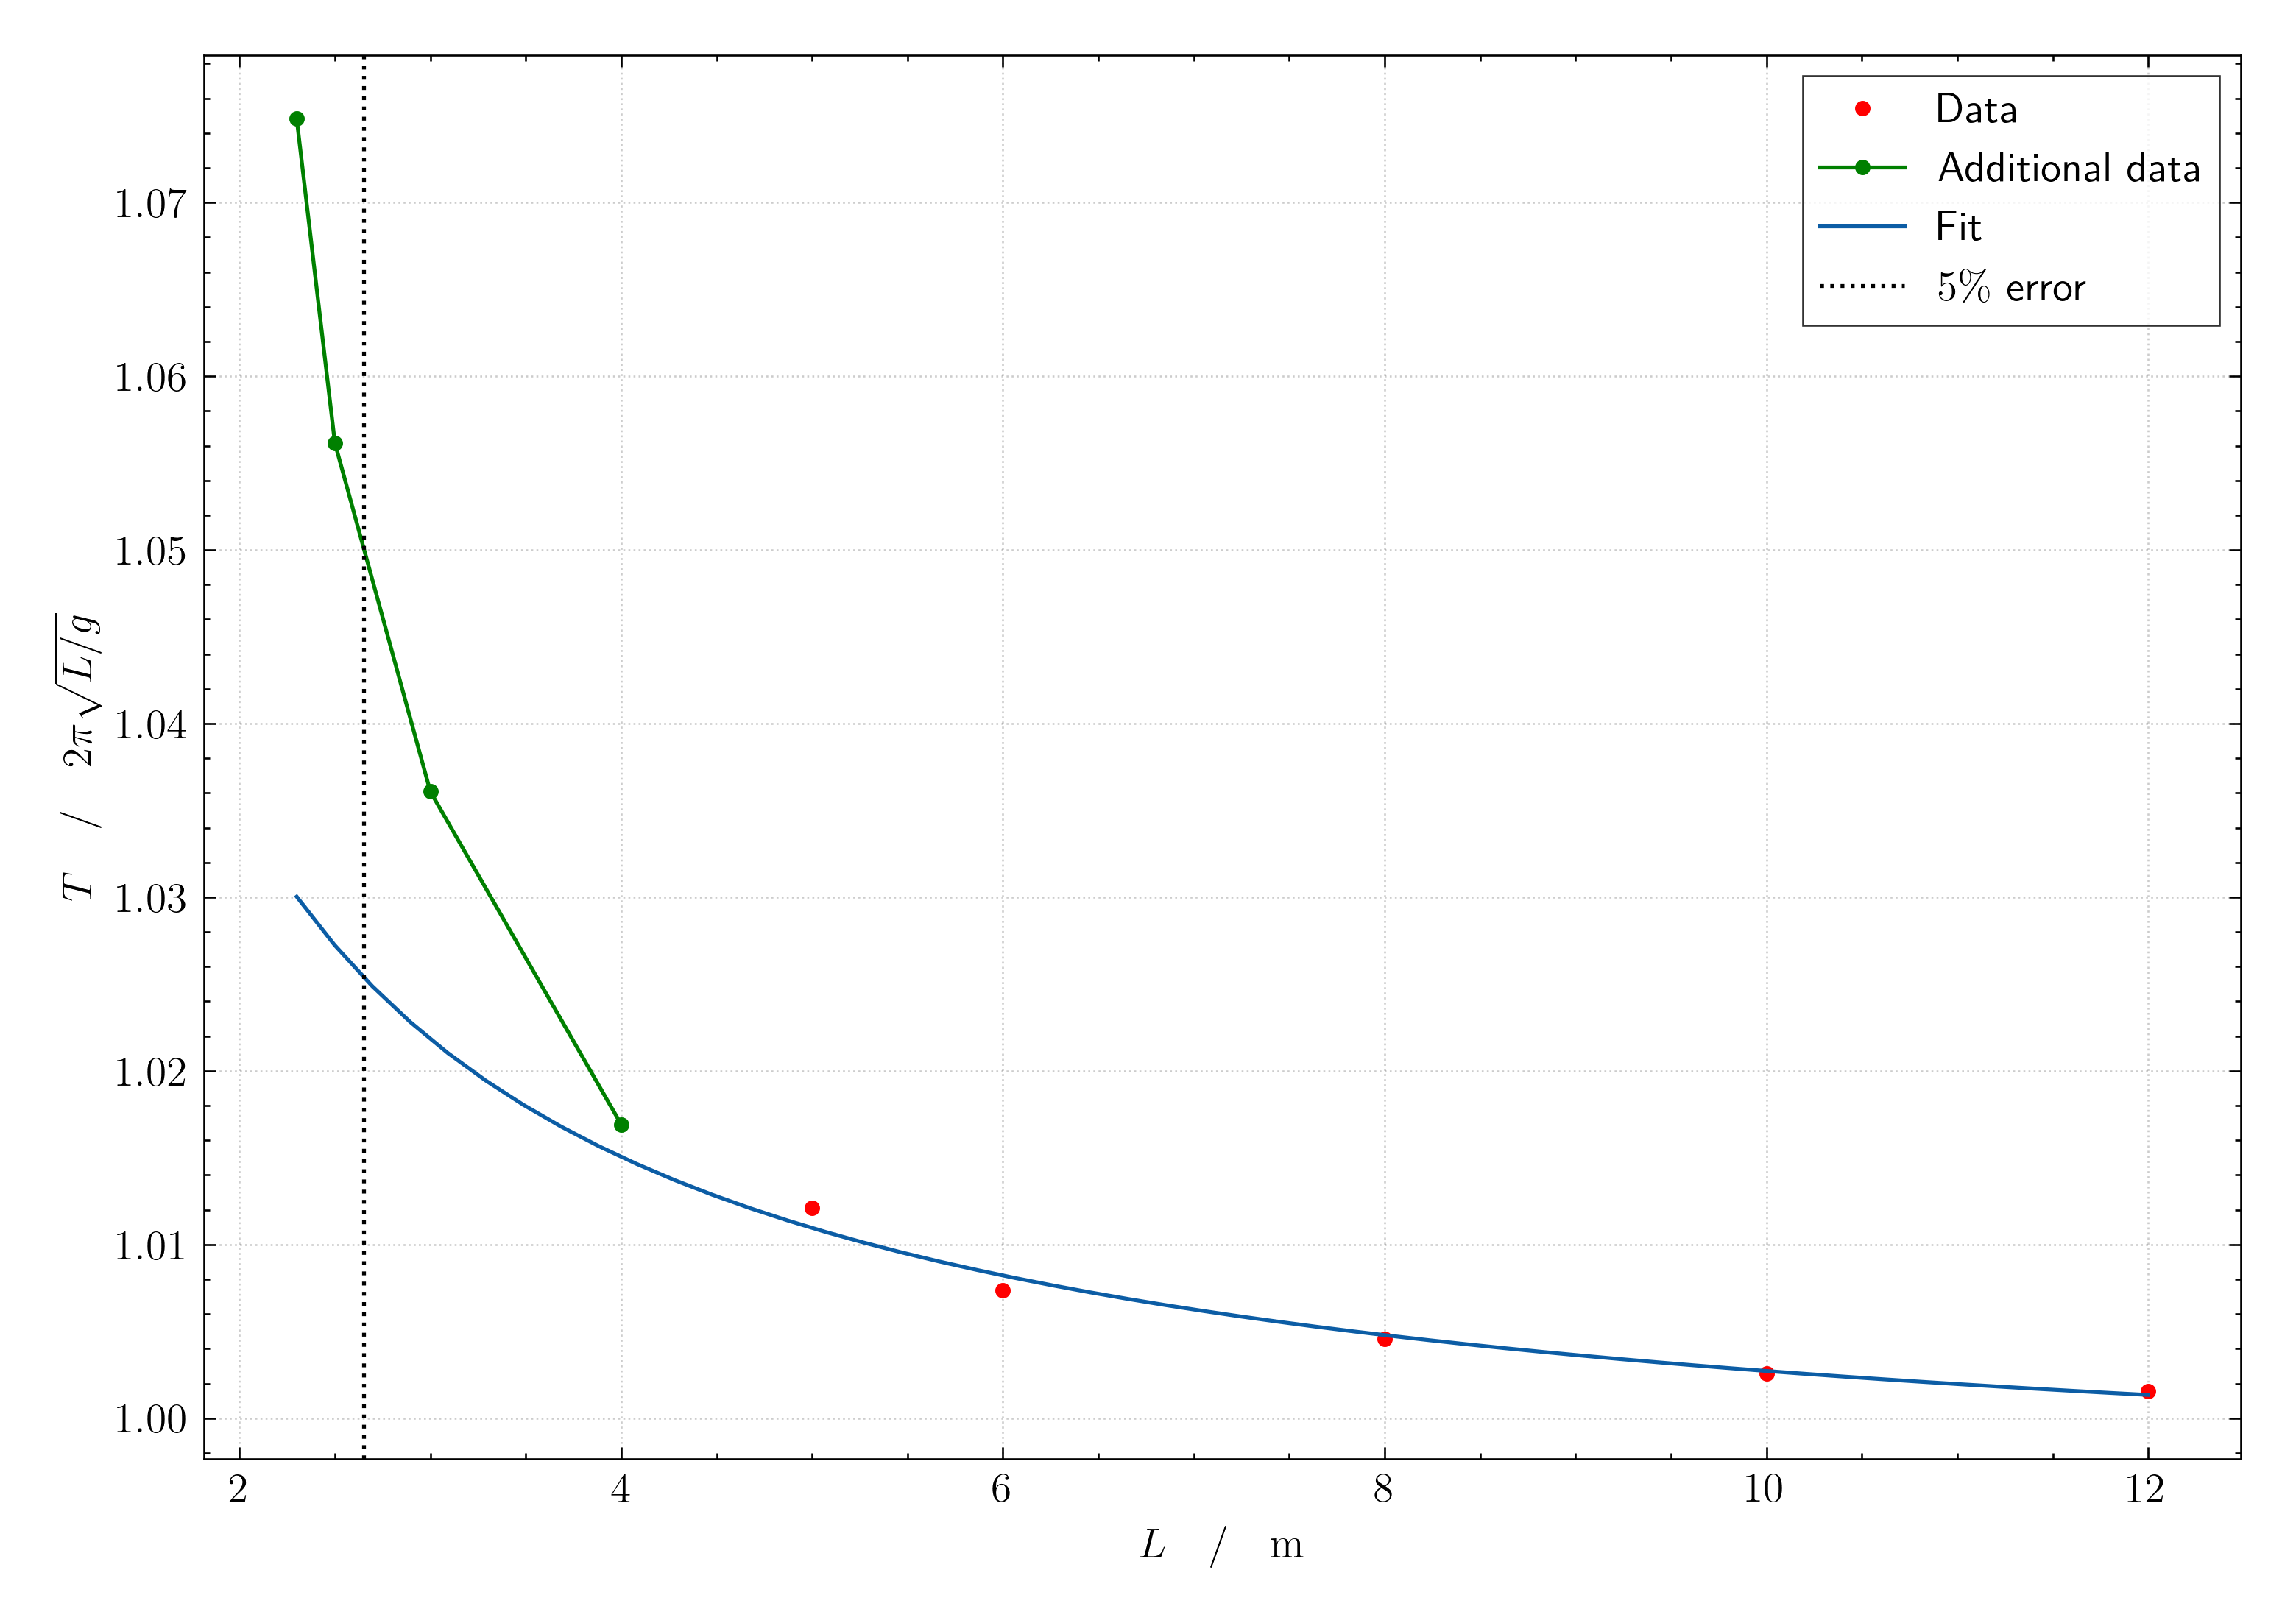

In [5]:
# A closer look at the deviation from the theory
fig, ax = plt.subplots()
ax.set_xlabel(r"$L\quad/\quad\mathrm{m}$")
ax.set_ylabel(r"$T\quad/\quad 2 \pi \sqrt{L / g}$")
ax.plot(data.L[:5], data['T'][:5] / (2 * np.pi * np.sqrt(data.L[:5] / g)), 'r.', label="Data")
ax.plot(data.L[5:], data['T'][5:] / (2 * np.pi * np.sqrt(data.L[5:] / g)), 'g.-', label="Additional data")
x = np.linspace(data.L.min(), data.L.max())
ax.plot(x, np.sqrt(sum(w[i] * x**i for i in range(2))) / (2 * np.pi * np.sqrt(x / g)), label="Fit")
ax.axvline(2.65, c='k', ls=':', label='$5\%$ error')
ax.legend()
plt.show()

In [6]:
print(f"A 5% error is attaned when theta ≈ {np.arcsin(D / 2.65) * 180 / np.pi:.0f}°")

A 5% error is attaned when theta ≈ 49°
